# MultiIndexes
## AKA Heirarchical Indexes

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
carstocks = pd.read_csv("data/car_stocks.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data/car_stocks.csv'

In [80]:
titanic = pd.read_csv("/content/drive/MyDrive/DEPI/Data/titanic.csv")
titanic['age'] = titanic["age"].replace(['?'], [None]).astype('float')
titanic['fare'] = titanic["fare"].replace(['?'], [None]).astype('float')

In [5]:
s1 = titanic.groupby("sex")["age"].mean()
s1

,age
sex,
female,28.687071
male,30.585233


In [ ]:
s1.index

## Grouping By Multiple Columns!

In [6]:
df = titanic.groupby(["pclass", "sex"])["age"].mean()

In [7]:
df.index

MultiIndex([(1, 'female'),
            (1,   'male'),
            (2, 'female'),
            (2,   'male'),
            (3, 'female'),
            (3,   'male')],
           names=['pclass', 'sex'])

In [8]:
titanic.index

RangeIndex(start=0, stop=1309, step=1)

In [9]:
df

pclass  sex   
1       female    37.037594
        male      41.029250
2       female    27.499191
        male      30.815401
3       female    22.185307
        male      25.962273
Name: age, dtype: float64

In [10]:
titanic.groupby(["sex", "age"]).mean(numeric_only=True)

pclass  survived     sibsp     parch       fare
sex    age                                                       
female 0.1667   3.000000  1.000000  1.000000  2.000000  20.575000
       0.7500   3.000000  1.000000  2.000000  1.000000  19.258300
       0.9167   2.000000  1.000000  1.000000  2.000000  27.750000
       1.0000   2.800000  0.800000  0.800000  1.400000  19.467500
       2.0000   2.571429  0.285714  1.428571  1.428571  39.955357
...                  ...       ...       ...       ...        ...
male   70.0000  1.500000  0.000000  0.500000  0.500000  40.750000
       70.5000  3.000000  0.000000  0.000000  0.000000   7.750000
       71.0000  1.000000  0.000000  0.000000  0.000000  42.079200
       74.0000  3.000000  0.000000  0.000000  0.000000   7.775000
       80.0000  1.000000  1.000000  0.000000  0.000000  30.000000

[166 rows x 5 columns]

## Creating Your Own MultiIndex

In [11]:
pops = pd.read_csv("/content/drive/MyDrive/DEPI/Data/state_pops.csv")

In [12]:
pops.index

RangeIndex(start=0, stop=1272, step=1)

In [15]:
pops.set_index("state")

,year,population
state,,
AL,2012,4817528.0
AL,2010,4785570.0
AL,2011,4801627.0
AL,2009,4757938.0
AL,2013,4833722.0
...,...,...
USA,2013,316128839.0
USA,2009,306771529.0
USA,2010,309326295.0


In [14]:
pops.set_index("year")

,state,population
year,,
2012,AL,4817528.0
2010,AL,4785570.0
2011,AL,4801627.0
2009,AL,4757938.0
2013,AL,4833722.0
...,...,...
2013,USA,316128839.0
2009,USA,306771529.0
2010,USA,309326295.0


In [13]:
pops.set_index(["state", "year"])

population
state year             
AL    2012    4817528.0
      2010    4785570.0
      2011    4801627.0
      2009    4757938.0
      2013    4833722.0
...                 ...
USA   2013  316128839.0
      2009  306771529.0
      2010  309326295.0
      2011  311582564.0
      2012  313873685.0

[1272 rows x 1 columns]

In [16]:
pops.set_index(["year", "state"])

population
year state             
2012 AL       4817528.0
2010 AL       4785570.0
2011 AL       4801627.0
2009 AL       4757938.0
2013 AL       4833722.0
...                 ...
     USA    316128839.0
2009 USA    306771529.0
2010 USA    309326295.0
2011 USA    311582564.0
2012 USA    313873685.0

[1272 rows x 1 columns]

In [19]:
pops

population
state year             
AL    2012    4817528.0
      2010    4785570.0
      2011    4801627.0
      2009    4757938.0
      2013    4833722.0
...                 ...
USA   2013  316128839.0
      2009  306771529.0
      2010  309326295.0
      2011  311582564.0
      2012  313873685.0

[1272 rows x 1 columns]

## Sorting A MultiIndex

In [20]:
pops.sort_index()

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
...                ...
WY    2009    559851.0
      2010    564222.0
      2011    567329.0
      2012    576626.0
      2013    582658.0

[1272 rows x 1 columns]

In [21]:
pops.sort_index(ascending=False)

population
state year            
WY    2013    582658.0
      2012    576626.0
      2011    567329.0
      2010    564222.0
      2009    559851.0
...                ...
AK    1994    603308.0
      1993    599434.0
      1992    588736.0
      1991    570193.0
      1990    553290.0

[1272 rows x 1 columns]

In [22]:
pops.sort_index(level=1)

,,population
state,year,
AK,1990,553290.0
AL,1990,4050055.0
AR,1990,2356586.0
AZ,1990,3684097.0
CA,1990,29959515.0
...,...,...
VT,2013,626630.0
WA,2013,6971406.0
WI,2013,5742713.0


In [23]:
pops.sort_index(level=[1,0],ascending=[False,True])


,,population
state,year,
AK,2013,735132.0
AL,2013,4833722.0
AR,2013,2959373.0
AZ,2013,6626624.0
CA,2013,38332521.0
...,...,...
VT,1990,564798.0
WA,1990,4903043.0
WI,1990,4904562.0


In [24]:
pops.sort_index(inplace=True)

In [25]:
pops

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
...                ...
WY    2009    559851.0
      2010    564222.0
      2011    567329.0
      2012    576626.0
      2013    582658.0

[1272 rows x 1 columns]

## loc [] with MultiIndexes

In [26]:
pops

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
...                ...
WY    2009    559851.0
      2010    564222.0
      2011    567329.0
      2012    576626.0
      2013    582658.0

[1272 rows x 1 columns]

In [27]:
pops.loc["CA"]

,population
year,
1990,29959515.0
1991,30470736.0
1992,30974659.0
1993,31274928.0
1994,31484435.0
1995,31696582.0
1996,32018834.0
1997,32486010.0
1998,32987675.0


In [28]:
pops.loc[["CA", "AK"]]

population
state year            
CA    1990  29959515.0
      1991  30470736.0
      1992  30974659.0
      1993  31274928.0
      1994  31484435.0
      1995  31696582.0
      1996  32018834.0
      1997  32486010.0
      1998  32987675.0
      1999  33499204.0
      2000  33987977.0
      2001  34479458.0
      2002  34871843.0
      2003  35253159.0
      2004  35574576.0
      2005  35827943.0
      2006  36021202.0
      2007  36250311.0
      2008  36604337.0
      2009  36961229.0
      2010  37333601.0
      2011  37668681.0
      2012  37999878.0
      2013  38332521.0
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
      1995    604412.0
      1996    608569.0
      1997    612968.0
      1998    619933.0
      1999    624779.0
      2000    627963.0
      2001    633714.0
      2002    642337.0
      2003    648414.0
      2004    659286.0
      2005    666946.0
      2006    675302.0
      2007    680300.0
      2008    687455.0
      2009    698895.0
      2010    713868.0
      2011    723375.0
      2012    730307.0
      2013    735132.0

In [29]:
pops.loc["NM": "TX"]

population
state year            
NM    1990   1521574.0
      1991   1555305.0
      1992   1595442.0
      1993   1636453.0
      1994   1682398.0
...                ...
TX    2009  24801761.0
      2010  25245178.0
      2011  25640909.0
      2012  26060796.0
      2013  26448193.0

[312 rows x 1 columns]

In [30]:
pops.loc[("MT",1991)]

,MT
,1991
population,809680.0


In [31]:
pops.loc[("MT",1992)]

,MT
,1992
population,825770.0


In [32]:
pops.loc[("CA", 2013)]

,CA
,2013
population,38332521.0


In [33]:
pops.loc[("AK",1991):("CA",1995)]

population
state year            
AK    1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
      1995    604412.0
...                ...
CA    1991  30470736.0
      1992  30974659.0
      1993  31274928.0
      1994  31484435.0
      1995  31696582.0

[101 rows x 1 columns]

In [34]:
pops.loc[("AK", 1990):("AK",1995)]

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
      1995    604412.0

In [35]:
pops.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1272 entries, ('AK', 1990) to ('WY', 2013)
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  1262 non-null   float64
dtypes: float64(1)
memory usage: 48.0+ KB


In [36]:
pops.loc[("AK", 2011):("AL",1993)]

population
state year            
AK    2011    723375.0
      2012    730307.0
      2013    735132.0
AL    1990   4050055.0
      1991   4099156.0
      1992   4154014.0
      1993   4214202.0

In [37]:
# This won't work!
pops.loc[:,1990]

KeyError: 1990

In [38]:
titanic.loc[19, "name"]

'Beattie, Mr. Thomson'

In [39]:
pops.loc[:, 1990, :]

,population
state,
AK,553290.0
AL,4050055.0
AR,2356586.0
AZ,3684097.0
CA,29959515.0
CO,3307618.0
CT,3291967.0
DC,605321.0
DE,669567.0


In [40]:
pops.loc[:, [1990,1991], :]

population
state year            
AK    1990    553290.0
      1991    570193.0
AL    1990   4050055.0
      1991   4099156.0
AR    1990   2356586.0
...                ...
WI    1991   4964343.0
WV    1990   1792548.0
      1991   1798735.0
WY    1990    453690.0
      1991    459260.0

[106 rows x 1 columns]

In [ ]:
pops.loc[slice(None), [1990,1991], :]

In [ ]:
pops.loc[:,2013,:]

## The .xs( ) Method

In [45]:
pops

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
...                ...
WY    2009    559851.0
      2010    564222.0
      2011    567329.0
      2012    576626.0
      2013    582658.0

[1272 rows x 1 columns]

In [46]:
pops.xs(2013, level="year")

,population
state,
AK,735132.0
AL,4833722.0
AR,2959373.0
AZ,6626624.0
CA,38332521.0
CO,5268367.0
CT,3596080.0
DC,646449.0
DE,925749.0


In [47]:
pops.xs(2013, level=1)

,population
state,
AK,735132.0
AL,4833722.0
AR,2959373.0
AZ,6626624.0
CA,38332521.0
CO,5268367.0
CT,3596080.0
DC,646449.0
DE,925749.0


## get_level_values( )

In [48]:
pops.index.levels

FrozenList([['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'USA', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]])

In [49]:
pops.index.get_level_values(0)

Index(['AK', 'AK', 'AK', 'AK', 'AK', 'AK', 'AK', 'AK', 'AK', 'AK',
       ...
       'WY', 'WY', 'WY', 'WY', 'WY', 'WY', 'WY', 'WY', 'WY', 'WY'],
      dtype='object', name='state', length=1272)

In [50]:
pops.index.get_level_values(1)

Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       ...
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013],
      dtype='int64', name='year', length=1272)

In [51]:
pops.loc[:, [1990, 1992, 1994], :]

population
state year            
AK    1990    553290.0
      1992    588736.0
      1994    603308.0
AL    1990   4050055.0
      1992   4154014.0
...                ...
WV    1992   1806451.0
      1994   1820421.0
WY    1990    453690.0
      1992    466251.0
      1994    480283.0

[159 rows x 1 columns]

In [ ]:
even_years = pops.index.get_level_values(1) % 2 == 0

In [ ]:
len(even_years)

1272

In [ ]:
len(pops)

1272

In [ ]:
even_years

array([ True, False,  True, ..., False,  True, False])

In [ ]:
pops[even_years]

population
state year            
AK    1990    553290.0
      1992    588736.0
      1994    603308.0
      1996    608569.0
      1998    619933.0
...                ...
WY    2004    509106.0
      2006    522667.0
      2008    546043.0
      2010    564222.0
      2012    576626.0

[636 rows x 1 columns]

In [52]:
pops[pops["population"]%2==0]

population
state year            
AK    1990    553290.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
      1995    604412.0
...                ...
WY    2004    509106.0
      2007    534876.0
      2010    564222.0
      2012    576626.0
      2013    582658.0

[645 rows x 1 columns]

In [53]:
even_pops = pops["population"] % 2 == 0

In [55]:
end_with_b=pops.index.get_level_values(0).str[1]=="B"
pops[end_with_b]

,,population
state,year,


In [56]:
ends_with_a = pops.index.get_level_values(0).str[1] == "A"

In [57]:
pops[ends_with_a]

population
state year            
CA    1990  29959515.0
      1991  30470736.0
      1992  30974659.0
      1993  31274928.0
      1994  31484435.0
...                ...
WA    2009   6667426.0
      2010   6742256.0
      2011   6821481.0
      2012   6895318.0
      2013   6971406.0

[192 rows x 1 columns]

## Heirarchical Columns!

In [58]:
df = titanic.groupby(["pclass", "sex"]).mean(numeric_only=True)

In [61]:
df.head()

survived        age     sibsp     parch        fare
pclass sex                                                        
1      female  0.965278  37.037594  0.555556  0.472222  109.412385
       male    0.340782  41.029250  0.340782  0.279330   69.888385
2      female  0.886792  27.499191  0.500000  0.650943   23.234827
       male    0.146199  30.815401  0.327485  0.192982   19.904946
3      female  0.490741  22.185307  0.791667  0.731481   15.324250

In [60]:
df.loc[2]

,survived,age,sibsp,parch,fare
sex,,,,,
female,0.886792,27.499191,0.500000,0.650943,23.234827
male,0.146199,30.815401,0.327485,0.192982,19.904946


In [59]:
df.loc[(2, "male")]

,2
,male
survived,0.146199
age,30.815401
sibsp,0.327485
parch,0.192982
fare,19.904946


In [64]:
df=titanic.groupby("pclass").agg(
    {
        "age": ["min", "max", "mean"],
        "fare": ["min", "max", "mean"]
        }
)
df

age                  fare                     
           min   max       mean  min       max       mean
pclass                                                   
1       0.9167  80.0  39.159918  0.0  512.3292  87.508992
2       0.6667  70.0  29.506705  0.0   73.5000  21.179196
3       0.1667  74.0  24.816367  0.0   69.5500  13.302889

In [65]:
df = titanic.groupby("sex").agg({
    "age": ["min", "max", "mean"],
    "fare": ["min", "max", "mean"],
    "survived": ["mean"]
})

In [ ]:
df

age                   fare                       survived
           min   max       mean   min       max       mean      mean
sex                                                                 
female  0.1667  76.0  28.687071  6.75  512.3292  46.198097  0.727468
male    0.3333  80.0  30.585233  0.00  512.3292  26.154601  0.190985

In [66]:
df.index

Index(['female', 'male'], dtype='object', name='sex')

In [67]:
df.columns

MultiIndex([(     'age',  'min'),
            (     'age',  'max'),
            (     'age', 'mean'),
            (    'fare',  'min'),
            (    'fare',  'max'),
            (    'fare', 'mean'),
            ('survived', 'mean')],
           )

In [68]:
df[("age", "mean")]

,age
,mean
sex,
female,28.687071
male,30.585233


In [70]:
df

age                   fare                       survived
           min   max       mean   min       max       mean      mean
sex                                                                 
female  0.1667  76.0  28.687071  6.75  512.3292  46.198097  0.727468
male    0.3333  80.0  30.585233  0.00  512.3292  26.154601  0.190985

## Stack( ) and Unstack( )

In [71]:
pops

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
...                ...
WY    2009    559851.0
      2010    564222.0
      2011    567329.0
      2012    576626.0
      2013    582658.0

[1272 rows x 1 columns]

In [73]:
unstacked_df = pops.unstack(level="state")

In [74]:
unstacked_df.stack()

population
year state            
1990 AK       553290.0
     AL      4050055.0
     AR      2356586.0
     AZ      3684097.0
     CA     29959515.0
...                ...
2013 VT       626630.0
     WA      6971406.0
     WI      5742713.0
     WV      1854304.0
     WY       582658.0

[1262 rows x 1 columns]

In [75]:
titanic.groupby(["pclass", "sex"])["age"].mean()

pclass  sex   
1       female    37.037594
        male      41.029250
2       female    27.499191
        male      30.815401
3       female    22.185307
        male      25.962273
Name: age, dtype: float64

<Axes: xlabel='pclass,sex'>

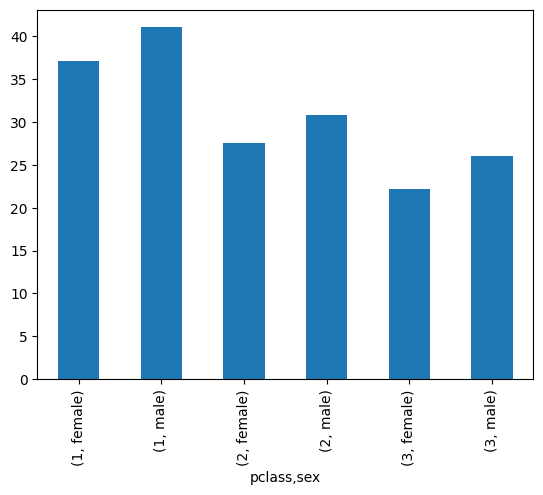

In [77]:
titanic.groupby(["pclass","sex"])["age"].agg("mean").plot(kind="bar")

<Axes: xlabel='pclass,sex'>

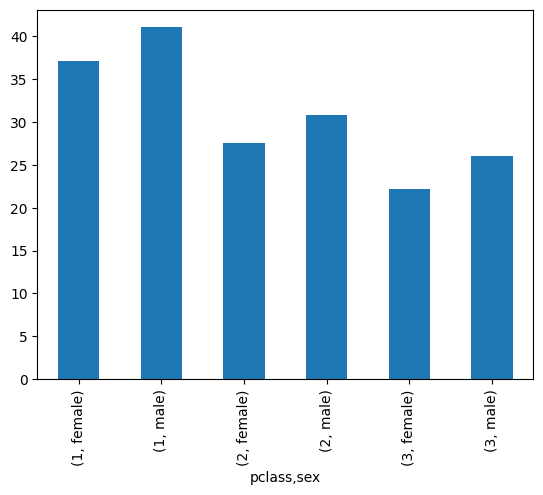

In [78]:
titanic.groupby(["pclass", "sex"])["age"].mean().plot(kind="bar")

In [82]:
titanic.groupby(["pclass", "sex"])["age"].mean()

pclass  sex   
1       female    37.037594
        male      41.029250
2       female    27.499191
        male      30.815401
3       female    22.185307
        male      25.962273
Name: age, dtype: float64

In [83]:
titanic.groupby(["pclass", "sex"])["age"].mean().unstack()

sex,female,male
pclass,,
1,37.037594,41.029250
2,27.499191,30.815401
3,22.185307,25.962273


<Axes: xlabel='pclass,sex'>

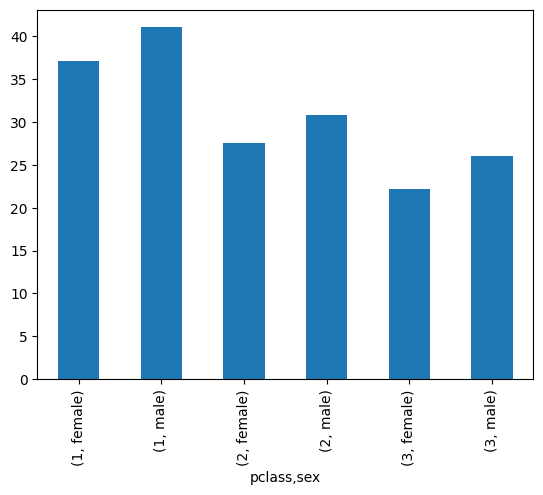

In [84]:
titanic.groupby(["pclass", "sex"])["age"].mean().plot(kind="bar")

<Axes: xlabel='sex'>

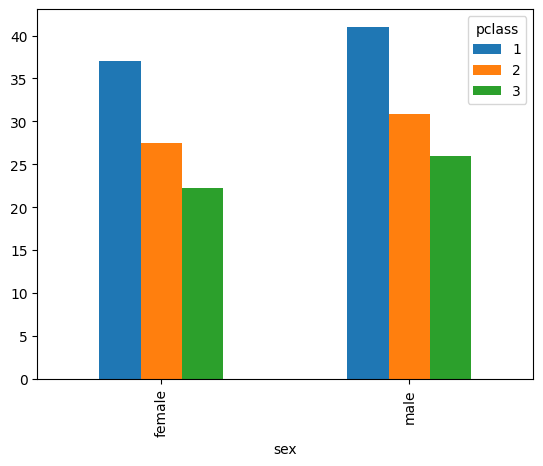

In [87]:
titanic.groupby(["sex","pclass"])["age"].mean().unstack().plot(kind="bar")

<Axes: xlabel='pclass'>

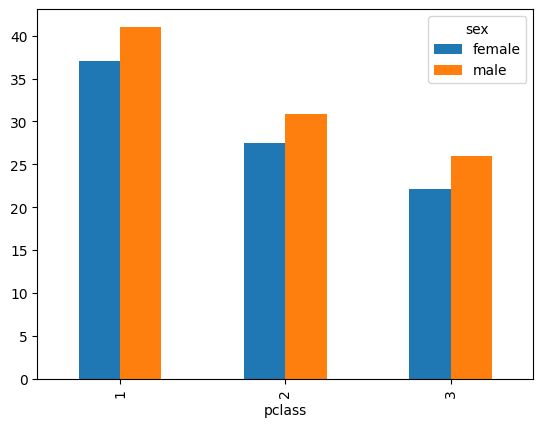

In [86]:
titanic.groupby(["pclass", "sex"])["age"].mean().unstack().plot(kind="bar")

In [88]:
titanic.groupby(["pclass", "sex"])["age"].mean().unstack(level="pclass")

pclass,1,2,3
sex,,,
female,37.037594,27.499191,22.185307
male,41.029250,30.815401,25.962273


<Axes: xlabel='sex'>

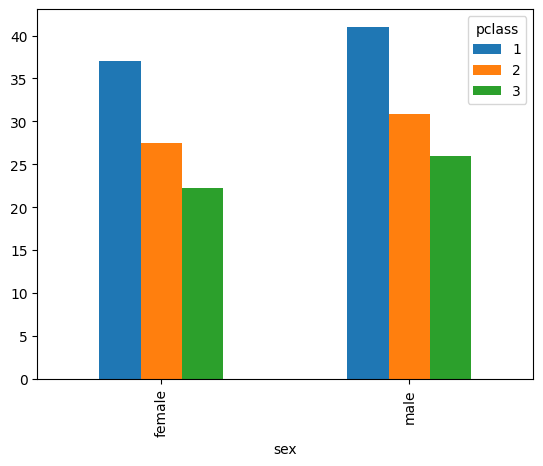

In [89]:
titanic.groupby(["pclass", "sex"])["age"].mean().unstack(level="pclass").plot(kind="bar")

In [90]:
titanic.groupby(["sex", "survived"])["age"].mean()

sex     survived
female  0           25.255208
        1           29.815354
male    0           31.516412
        1           26.977778
Name: age, dtype: float64

In [91]:
titanic.groupby(["sex", "survived"])["age"].mean().unstack()

survived,0,1
sex,,
female,25.255208,29.815354
male,31.516412,26.977778


<Axes: xlabel='sex'>

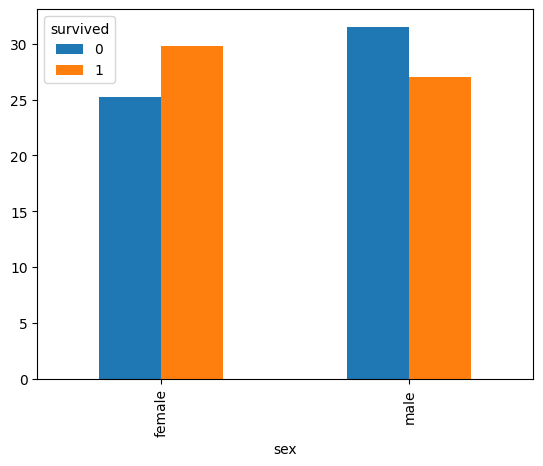

In [92]:
titanic.groupby(["sex", "survived"])["age"].mean().unstack().plot(kind="bar")

<AxesSubplot:xlabel='sex'>

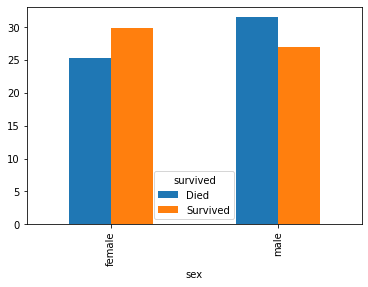

In [ ]:
df = titanic.groupby(["sex", "survived"])["age"].mean()
df.unstack().rename(columns={0: "Died", 1: "Survived"}).plot(kind="bar")

In [93]:
pops.groupby(level=1).sum()

,population
year,
1990,499245628.0
1991,505961884.0
1992,513028462.0
1993,519837190.0
1994,526251652.0
1995,532556806.0
1996,538788582.0
1997,545293864.0
1998,551708232.0


In [94]:
pops.groupby(level=0).min()

,population
state,
AK,553290.0
AL,4050055.0
AR,2356586.0
AZ,3684097.0
CA,29959515.0
CO,3307618.0
CT,3291967.0
DC,565232.0
DE,669567.0


In [95]:
pops.groupby(level=[1,0]).min()

population
year state            
1990 AK       553290.0
     AL      4050055.0
     AR      2356586.0
     AZ      3684097.0
     CA     29959515.0
...                ...
2013 VT       626630.0
     WA      6971406.0
     WI      5742713.0
     WV      1854304.0
     WY       582658.0

[1272 rows x 1 columns]

In [96]:
pops.index

MultiIndex([('AK', 1990),
            ('AK', 1991),
            ('AK', 1992),
            ('AK', 1993),
            ('AK', 1994),
            ('AK', 1995),
            ('AK', 1996),
            ('AK', 1997),
            ('AK', 1998),
            ('AK', 1999),
            ...
            ('WY', 2004),
            ('WY', 2005),
            ('WY', 2006),
            ('WY', 2007),
            ('WY', 2008),
            ('WY', 2009),
            ('WY', 2010),
            ('WY', 2011),
            ('WY', 2012),
            ('WY', 2013)],
           names=['state', 'year'], length=1272)

In [97]:
pops.groupby(["year", "state"]).min()

population
year state            
1990 AK       553290.0
     AL      4050055.0
     AR      2356586.0
     AZ      3684097.0
     CA     29959515.0
...                ...
2013 VT       626630.0
     WA      6971406.0
     WI      5742713.0
     WV      1854304.0
     WY       582658.0

[1272 rows x 1 columns]